# Missing data and aggregations



In [37]:
import pandas as pd
import numpy as np

np.random.seed(1337)
size = 8

random_matrix = np.random.randint(1, 10, (size, size))
random_matrix


array([[8, 9, 8, 8, 3, 3, 5, 9],
       [7, 7, 8, 9, 2, 7, 7, 3],
       [3, 9, 2, 8, 4, 2, 4, 4],
       [5, 9, 9, 8, 5, 2, 7, 5],
       [5, 3, 6, 8, 5, 3, 4, 3],
       [5, 9, 7, 4, 9, 9, 8, 5],
       [4, 3, 2, 3, 1, 4, 9, 3],
       [2, 1, 2, 5, 3, 1, 1, 8]])

In [38]:
print(f"{random_matrix.size = }")
index = np.random.choice(random_matrix.size, 10, replace=False)
print(f"{index= }")


random_matrix.size = 64
index= array([28, 42, 17, 49, 53, 31, 35,  2, 13, 62])


In [39]:
# random_matrix[5,3] = 999
random_matrix.ravel()


array([8, 9, 8, 8, 3, 3, 5, 9, 7, 7, 8, 9, 2, 7, 7, 3, 3, 9, 2, 8, 4, 2,
       4, 4, 5, 9, 9, 8, 5, 2, 7, 5, 5, 3, 6, 8, 5, 3, 4, 3, 5, 9, 7, 4,
       9, 9, 8, 5, 4, 3, 2, 3, 1, 4, 9, 3, 2, 1, 2, 5, 3, 1, 1, 8])

In [40]:
# type converts it to float so that we can change elements to None
random_matrix = random_matrix * 1.0
random_matrix.ravel()[index] = None
random_matrix


array([[ 8.,  9., nan,  8.,  3.,  3.,  5.,  9.],
       [ 7.,  7.,  8.,  9.,  2., nan,  7.,  3.],
       [ 3., nan,  2.,  8.,  4.,  2.,  4.,  4.],
       [ 5.,  9.,  9.,  8., nan,  2.,  7., nan],
       [ 5.,  3.,  6., nan,  5.,  3.,  4.,  3.],
       [ 5.,  9., nan,  4.,  9.,  9.,  8.,  5.],
       [ 4., nan,  2.,  3.,  1., nan,  9.,  3.],
       [ 2.,  1.,  2.,  5.,  3.,  1., nan,  8.]])

In [41]:
pd.DataFrame(random_matrix)

,0,1,2,3,4,5,6,7
0,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
1,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
2,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
3,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
4,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
5,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
6,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
7,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


In [42]:
scores = pd.DataFrame(
    random_matrix,
    index=[f"Player {i}" for i in range(1, size + 1)],
    columns=[f"Round {i}" for i in range(1, size + 1)],
)
scores


,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


## missing data


In [43]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,True,False,False,False,False,False
Player 2,False,False,False,False,False,True,False,False
Player 3,False,True,False,False,False,False,False,False
Player 4,False,False,False,False,True,False,False,True
Player 5,False,False,False,True,False,False,False,False
Player 6,False,False,True,False,False,False,False,False
Player 7,False,True,False,False,False,True,False,False
Player 8,False,False,False,False,False,False,True,False


In [44]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  6 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  7 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  7 non-null      float64
 7   Round 8  7 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [45]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


In [46]:
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8


In [47]:
scores.loc["Player 8"]["Round 7"]= 4

In [48]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [49]:
scores.dropna() # drops all rows that has a nan

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [50]:
scores.dropna(axis = "columns", inplace = False)

,Round 1,Round 7
Player 1,8.0,5.0
Player 2,7.0,7.0
Player 3,3.0,4.0
Player 4,5.0,7.0
Player 5,5.0,4.0
Player 6,5.0,8.0
Player 7,4.0,9.0
Player 8,2.0,4.0


In [54]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [52]:
scores.fillna(0, inplace = True) # fills all nulls with zeros

In [53]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


## Missing data- strategy


In [55]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [57]:
type(titanic["survived"])

pandas.core.series.Series

In [58]:
titanic["survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [60]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [61]:
titanic["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [62]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [64]:
titanic["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [65]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
nans = titanic.isnull()
nans

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
nans = titanic.isnull().head()
nans

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [69]:
nans = titanic.isnull().sum()
nans

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

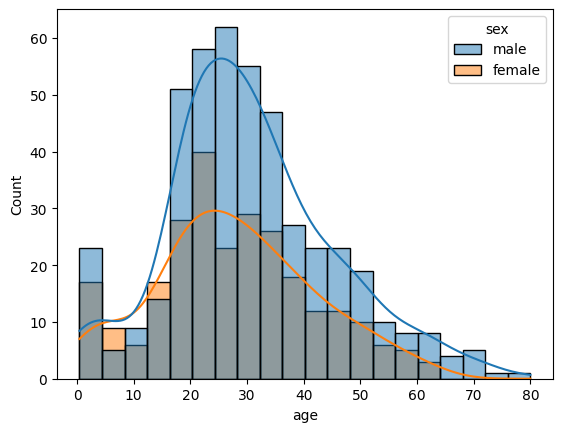

In [75]:
sns.histplot(data = titanic, x = "age", hue= "sex", kde=True)

In [78]:
# case
# a historian (domain expert) advices us to use median age of corresponding gender to fill in missing ages

males = titanic[titanic["sex"] == "male"]
males

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [79]:
median_male_age = titanic[titanic["sex"] == "male"]["age"].median() 
median_female_age = titanic[titanic["sex"] == "female"]["age"].median() 
median_male_age, median_female_age

(29.0, 27.0)

In [83]:
titanic.loc[titanic["sex"]== "male", "age"] = titanic.loc[titanic["sex"]== "male", "age"].fillna(median_male_age)
titanic.loc[titanic["age"]== 29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [85]:
titanic["age"].isnull().sum() # nulls left to fill

53

In [87]:
titanic.loc[titanic["age"].isnull(), "sex"]

19     female
28     female
31     female
32     female
47     female
82     female
109    female
128    female
140    female
166    female
180    female
186    female
198    female
229    female
235    female
240    female
241    female
256    female
264    female
274    female
300    female
303    female
306    female
330    female
334    female
347    female
358    female
359    female
367    female
368    female
375    female
409    female
415    female
431    female
457    female
485    female
502    female
533    female
564    female
573    female
578    female
593    female
596    female
612    female
653    female
669    female
680    female
697    female
727    female
792    female
849    female
863    female
888    female
Name: sex, dtype: object

In [86]:
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()

female    53
Name: sex, dtype: int64

In [90]:
# fill in the rest of nans with median female age
titanic["age"] = titanic["age"].fillna(median_female_age)
titanic.isnull().sum()["sex"]


0

<AxesSubplot: xlabel='age', ylabel='Count'>

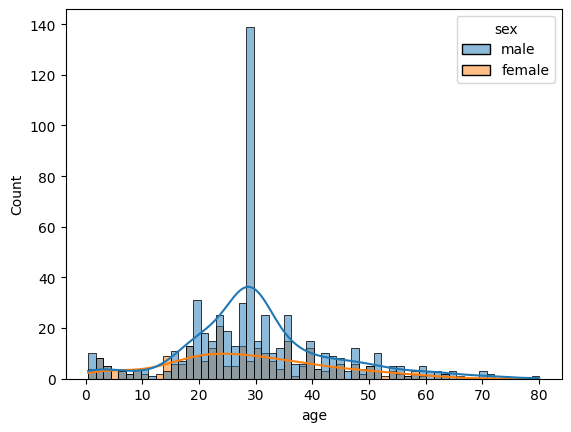

In [89]:
sns.histplot(data= titanic, x = "age", kde = True, hue = "sex", bins = 60)

# TODO: use who category and find median
  left to thw reader